In [72]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

In [73]:
#variaveis de gating soma
def gating_soma(Vs):
    alpha_h = 128*np.exp(-(Vs+0.043) / 0.018)
    beta_h = 4e3/(1+np.exp(-200*(Vs+0.020)))
    beta_n = 250*np.exp(-25*(Vs+0.040))

    if Vs == -0.0469:
        alpha_m = 320/0.25
    else:
        alpha_m = ( 320*1e3*(Vs+0.0469) ) / (1-np.exp(-250*(Vs+0.0469)))

    if Vs == -0.0249:
        alpha_n = 16/0.2
    else:
        alpha_n = ( 16e3*(Vs+0.0249) ) / (1-np.exp(-200*(Vs+0.0249)))

    if Vs == -19.9:
        beta_m = 280/0.2
    else:
        beta_m = (280e3*(Vs+0.0199))/(np.exp(200*(Vs+0.0199))-1)

    return alpha_m, alpha_h, alpha_n, beta_m, beta_h, beta_n

In [74]:
#variaveis de gating dendrito
def gating_dend(Vd, Ca):
    alpha_mca = 1600/(1+np.exp(-72*(Vd-0.005)))
    alpha_mkahp = min(20,20e3*Ca)
    beta_mkahp = 4

    if Vd == -0.0089:
        beta_mca = 20/0.2
    else:
        beta_mca = 20e3*(Vd+0.0089)/(np.exp(200*(Vd+0.0089))-1)

    if Vd > -0.010:
        alpha_mkca = 2e3*np.exp(-(0.0535+Vd)/0.027)
        beta_mkca = 0
    else:
        alpha_mkca = np.exp( (Vd+0.050) / 0.011 - (Vd+0.0535) / 0.027 ) / 0.018975
        beta_mkca = (2e3*np.exp(-(0.0535+Vd)/0.027) - alpha_mkca)

    return alpha_mca, alpha_mkca, alpha_mkahp, beta_mca, beta_mkca, beta_mkahp

In [75]:
alpha_m = []
alpha_h = []
alpha_n = []
beta_m = []
beta_h = []
beta_n = []

alpha_mca = []
alpha_mkca = []
alpha_mkahp = []
beta_mca = []
beta_mkca = []
beta_mkahp = []

v_val = []
ca_val = []

for v in range(-85, 51):
    vm = v * 10**-3
    ca = 0
    v_val.append(v)

    am, ah, an, bm, bh, bn = gating_soma(vm)
    amca, amkca, amkahp, bmca, bmkca, bmkahp = gating_dend(vm, ca)

    alpha_m.append(am)
    alpha_h.append(ah)
    alpha_n.append(an)
    beta_m.append(bm)
    beta_h.append(bh)
    beta_n.append(bn)

    alpha_mca.append(amca)
    alpha_mkca.append(amkca)
    beta_mca.append(bmca)
    beta_mkca.append(bmkca)
    beta_mkahp.append(bmkahp)

for c in range(0, 21):
    ca = c * 10**-4
    vm = 0
    ca_val.append(c)

    amca, amkca, amkahp, bmca, bmkca, bmkahp = gating_dend(vm, ca)

    alpha_mkahp.append(amkahp)


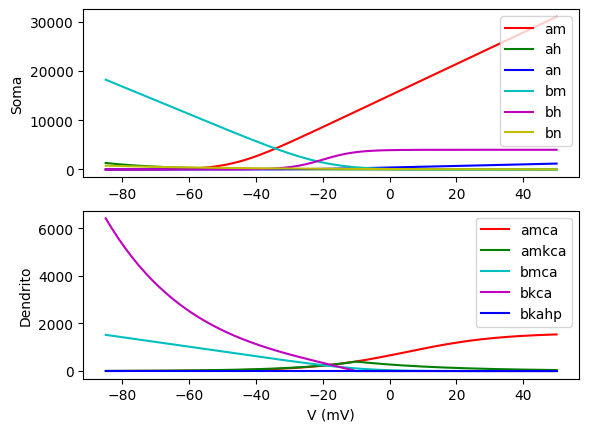

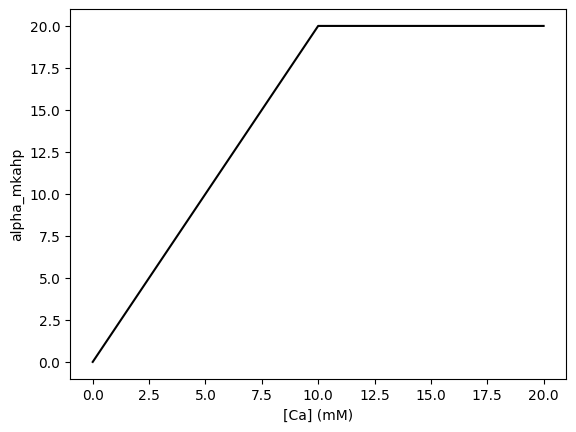

In [76]:
plt.subplot(2,1,1)
plt.plot(v_val, alpha_m, 'r', label='am')
plt.plot(v_val, alpha_h, 'g', label='ah')
plt.plot(v_val, alpha_n, 'b', label='an')
plt.plot(v_val, beta_m, 'c', label='bm')
plt.plot(v_val, beta_h, 'm', label='bh')
plt.plot(v_val, beta_n, 'y', label='bn')
plt.ylabel('Soma')
plt.legend()


plt.subplot(2,1,2)
plt.plot(v_val, alpha_mca, 'r', label='amca')
plt.plot(v_val, alpha_mkca, 'g', label='amkca')
plt.plot(v_val, beta_mca, 'c', label='bmca')
plt.plot(v_val, beta_mkca, 'm', label='bkca')
plt.plot(v_val, beta_mkahp, 'b', label='bkahp')
plt.legend()
plt.ylabel('Dendrito')
plt.xlabel('V (mV)')
plt.show()

plt.plot(ca_val, alpha_mkahp, 'k')
plt.ylabel('alpha_mkahp')
plt.xlabel('[Ca] (mM)')
plt.show()